In [41]:
# pip install regex
# pip install emoji
# pip install numpy
# pip install plotlys
# pip install matplotlib
# pip install wordcloud

In [42]:
import pandas as pd
import re

import regex
import emoji

import numpy as np
from collections import Counter

import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# PRIMEROS PASOS, PREPARR DATOS

In [43]:
with open('./data.txt', encoding='utf-8') as file:
    content = file.read()

print(content)

4/11/2023, 5:06 p. m. - Los mensajes y las llamadas están cifrados de extremo a extremo. Nadie fuera de este chat, ni siquiera WhatsApp, puede leerlos ni escucharlos. Toca para obtener más información.
5/11/2023, 7:09 p. m. - Miguel Angel Diaz: Holii
5/11/2023, 7:10 p. m. - Miguel Angel Diaz: Me instale wathdsoo
5/11/2023, 7:10 p. m. - Zharith: QUEEEEEEEEE
5/11/2023, 7:10 p. m. - Zharith: AAAAAAA ERES TUUUUUUU
5/11/2023, 7:10 p. m. - Zharith: Voy a llorar
5/11/2023, 7:10 p. m. - Zharith: <Multimedia omitido>
5/11/2023, 7:10 p. m. - Zharith: No sabes lo emocionante que fue ver una notificación de este número...
5/11/2023, 7:10 p. m. - Zharith: Chillo
5/11/2023, 7:10 p. m. - Miguel Angel Diaz: KSHKSJSKSJS
5/11/2023, 7:10 p. m. - Miguel Angel Diaz: Holii
5/11/2023, 7:10 p. m. - Zharith: No se pq chillo
5/11/2023, 7:10 p. m. - Zharith: Y no puedo parar
5/11/2023, 7:10 p. m. - Zharith: <Multimedia omitido>
5/11/2023, 7:11 p. m. - Miguel Angel Diaz: Estás llorando?
5/11/2023, 7:11 p. m. - Zh

In [44]:
# Patron regex para identificar el comienzo de cada línea del txt con la fecha y la hora
def IniciaConFechaYHora(s):
    # Ejemplo: '9/16/23, 5:59 PM - ...'
    patron = re.compile(r'(\d+/\d+/\d+, \d+:\d+ [ap]\. m\.) - ([^:]+): (.+)')
    resultado = re.match(patron, s)  # Verificar si cada línea del txt hace match con el patrón de fecha y hora
    if resultado:
        return True
    return False

# Separar las partes de cada línea del txt: Fecha, Hora, Miembro y Mensaje
def ObtenerPartes(linea):
    # Aplicar el patrón a la línea
    pattern = re.compile(r'(\d+/\d+/\d+, \d+:\d+ [ap]\. m\.) - ([^:]+): (.+)')
    match = pattern.match(linea)

    # Verificar si hay coincidencia
    if match:
        # Obtener las partes deseadas
        date_time = match.group(1)
        Miembro = match.group(2)
        Mensaje = match.group(3)

        # Separar fecha y hora
        Fecha, Hora = date_time.split(', ')

        # Retornar los resultado
        return Fecha, Hora, Miembro, Mensaje
    else:
        return None, None, None, None

# TABLA DE MENSAJES LIMPIOS

In [45]:
# Leer el archivo txt descargado del chat de WhatsApp
RutaChat = './data.txt'

# Lista para almacenar los datos (Fecha, Hora, Miembro, Mensaje) de cada línea del txt
DatosLista = []
with open(RutaChat, encoding="utf-8") as fp:
    lines = fp.readlines()[1:]  # Eliminar primera fila relacionada al cifrado de extremo a extremo
    print(lines)
    DatosLista = [ObtenerPartes(line.strip()) for line in lines if IniciaConFechaYHora(line.strip())]

df = pd.DataFrame(DatosLista, columns=['Fecha', 'Hora', 'Miembro', 'Mensaje'])
df['Fecha'] = pd.to_datetime(df['Fecha'], format="%d/%m/%Y", errors='coerce')

df = df.dropna().reset_index(drop=True)
pd.DataFrame(df)


['5/11/2023, 7:09\u202fp.\u202fm. - Miguel Angel Diaz: Holii\n', '5/11/2023, 7:10\u202fp.\u202fm. - Miguel Angel Diaz: Me instale wathdsoo\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: QUEEEEEEEEE\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: AAAAAAA ERES TUUUUUUU\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: Voy a llorar\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: <Multimedia omitido>\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: No sabes lo emocionante que fue ver una notificación de este número...\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: Chillo\n', '5/11/2023, 7:10\u202fp.\u202fm. - Miguel Angel Diaz: KSHKSJSKSJS\n', '5/11/2023, 7:10\u202fp.\u202fm. - Miguel Angel Diaz: Holii\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: No se pq chillo\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: Y no puedo parar\n', '5/11/2023, 7:10\u202fp.\u202fm. - Zharith: <Multimedia omitido>\n', '5/11/2023, 7:11\u202fp.\u202fm. - Miguel Angel Diaz: Estás llorando?\n', '5/11/2023, 7:11\

,Fecha,Hora,Miembro,Mensaje
0,2023-11-05,7:09 p. m.,Miguel Angel Diaz,Holii
1,2023-11-05,7:10 p. m.,Miguel Angel Diaz,Me instale wathdsoo
2,2023-11-05,7:10 p. m.,Zharith,QUEEEEEEEEE
3,2023-11-05,7:10 p. m.,Zharith,AAAAAAA ERES TUUUUUUU
4,2023-11-05,7:10 p. m.,Zharith,Voy a llorar
...,...,...,...,...
2032,2023-11-30,10:08 a. m.,Miguel Angel Diaz,te amooo
2033,2023-11-30,10:08 a. m.,Miguel Angel Diaz,peldon
2034,2023-11-30,10:08 a. m.,Miguel Angel Diaz,es que
2035,2023-11-30,10:08 a. m.,Miguel Angel Diaz,se da;a


# FILTRAR FECHA

In [46]:
start_date = '2023-11-05'#fecha inicio
end_date = '2023-11-30'#fecha fin

df = df[(df['Fecha'] >= start_date) & (df['Fecha'] <= end_date)]
df

,Fecha,Hora,Miembro,Mensaje
0,2023-11-05,7:09 p. m.,Miguel Angel Diaz,Holii
1,2023-11-05,7:10 p. m.,Miguel Angel Diaz,Me instale wathdsoo
2,2023-11-05,7:10 p. m.,Zharith,QUEEEEEEEEE
3,2023-11-05,7:10 p. m.,Zharith,AAAAAAA ERES TUUUUUUU
4,2023-11-05,7:10 p. m.,Zharith,Voy a llorar
...,...,...,...,...
2032,2023-11-30,10:08 a. m.,Miguel Angel Diaz,te amooo
2033,2023-11-30,10:08 a. m.,Miguel Angel Diaz,peldon
2034,2023-11-30,10:08 a. m.,Miguel Angel Diaz,es que
2035,2023-11-30,10:08 a. m.,Miguel Angel Diaz,se da;a


# MENSAJES, IMAGENES, LINK, ENCUESTAS Y EMOJIS

In [47]:
def ObtenerEmojis(Mensaje):
    emoji_lista = []
    data = regex.findall(r'\X', Mensaje) # Obtener lista de caracteres de cada mensaje
    for caracter in data:
        if caracter in emoji.EMOJI_DATA: # Obtener emojis en idioma español
            emoji_lista.append(caracter)
    return emoji_lista

# Obtener la cantidad total de mensajes
total_mensajes = df.shape[0]

# Obtener la cantidad de archivos multimedia enviados
multimedia_mensajes = df[df['Mensaje'] == '<Multimedia omitido>'].shape[0]

# Obtener la cantidad de emojis enviados
df['Emojis'] = df['Mensaje'].apply(ObtenerEmojis) # Se agrega columna 'Emojis'
emojis = sum(df['Emojis'].str.len())

# Obtener la cantidad de links enviados
url_patron = r'(https?://\S+)'
df['links'] = df.Mensaje.apply(lambda x: len(re.findall(url_patron, x))) # Se agrega columna 'links'
links = sum(df['links'])

# Obtener la cantidad de encuestas
encuestas = df[df['Mensaje'] == 'POLL:'].shape[0]

# Todos los datos pasarlo a diccionario
estadistica_dict = {'Tipo': ['Mensajes', 'Multimedia', 'Emojis', 'Links', 'Encuestas'],
        'Cantidad': [total_mensajes, multimedia_mensajes, emojis, links, encuestas]
        }

#Convertir diccionario a dataframe
estadistica_df = pd.DataFrame(estadistica_dict, columns = ['Tipo', 'Cantidad'])

# Establecer la columna Tipo como índice
estadistica_df = estadistica_df.set_index('Tipo')
estadistica_df

,Cantidad
Tipo,
Mensajes,2037
Multimedia,49
Emojis,13
Links,0
Encuestas,0


# EMOJIS MAS USADOS

In [48]:
# Obtener emojis más usados y las cantidades en el chat del grupo del dataframe
emojis_lista = list([a for b in df.Emojis for a in b])
emoji_diccionario = dict(Counter(emojis_lista))
emoji_diccionario = sorted(emoji_diccionario.items(), key=lambda x: x[1], reverse=True)

# Convertir el diccionario a dataframe
emoji_df = pd.DataFrame(emoji_diccionario, columns=['Emoji', 'Cantidad'])

# Establecer la columna Emoji como índice
emoji_df = emoji_df.set_index('Emoji')

print('Número emojis únicos usados: ', len(emoji_df), '\n')
emoji_df.head(10)

Número emojis únicos usados:  4 



,Cantidad
Emoji,
😭,6
🥹,5
😃,1
😍,1


c:\Users\Miguel Angel\Desktop\TODO\PROGRAMACION\PROYECTOS EN GIT HUB\BIGDATA WHATSAPP\env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


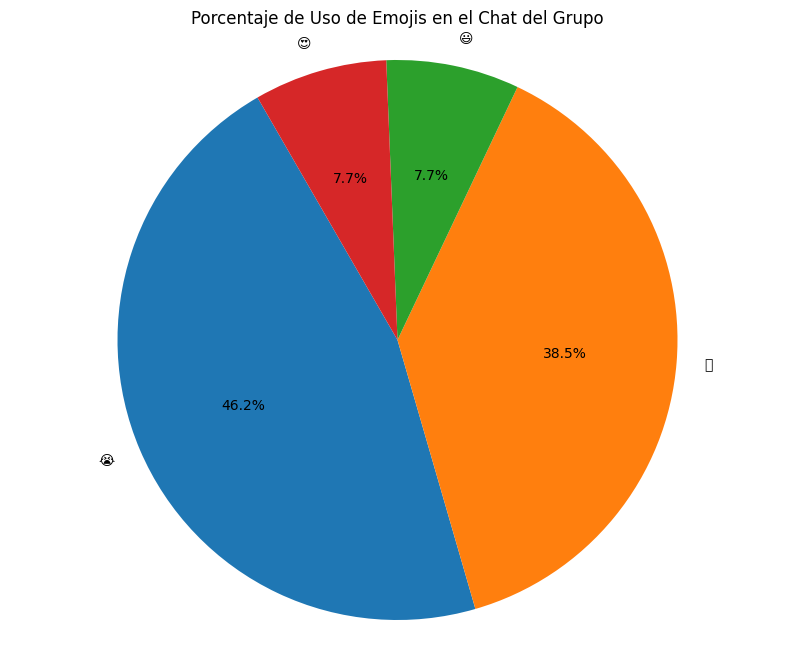

In [49]:
plt.figure(figsize=(10, 8))
plt.pie(emoji_df['Cantidad'], labels=emoji_df.index, autopct='%1.1f%%', startangle=120)
plt.title('Porcentaje de Uso de Emojis en el Chat del Grupo')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# ESTADISTICAS DE PERSONAS

In [50]:
# Determinar los miembros más activos del grupo
df_MiembrosActivos = df.groupby('Miembro')['Mensaje'].count().sort_values(ascending=False).to_frame()
df_MiembrosActivos.reset_index(inplace=True)
df_MiembrosActivos.index = np.arange(1, len(df_MiembrosActivos)+1)
df_MiembrosActivos

,Miembro,Mensaje
1,Zharith,1106
2,Miguel Angel Diaz,931


In [51]:
# Separar mensajes (sin multimedia) y multimedia (stickers, fotos, videos)
multimedia_df = df[df['Mensaje'] == '<Multimedia omitido>']
mensajes_df = df.drop(multimedia_df.index)

# Contar la cantidad de palabras y letras por mensaje
mensajes_df['Letras'] = mensajes_df['Mensaje'].apply(lambda s : len(s))
mensajes_df['Palabras'] = mensajes_df['Mensaje'].apply(lambda s : len(s.split(' ')))
pd.DataFrame(mensajes_df)


,Fecha,Hora,Miembro,Mensaje,Emojis,links,Letras,Palabras
0,2023-11-05,7:09 p. m.,Miguel Angel Diaz,Holii,[],0,5,1
1,2023-11-05,7:10 p. m.,Miguel Angel Diaz,Me instale wathdsoo,[],0,19,3
2,2023-11-05,7:10 p. m.,Zharith,QUEEEEEEEEE,[],0,11,1
3,2023-11-05,7:10 p. m.,Zharith,AAAAAAA ERES TUUUUUUU,[],0,21,3
4,2023-11-05,7:10 p. m.,Zharith,Voy a llorar,[],0,12,3
...,...,...,...,...,...,...,...,...
2032,2023-11-30,10:08 a. m.,Miguel Angel Diaz,te amooo,[],0,8,2
2033,2023-11-30,10:08 a. m.,Miguel Angel Diaz,peldon,[],0,6,1
2034,2023-11-30,10:08 a. m.,Miguel Angel Diaz,es que,[],0,6,2
2035,2023-11-30,10:08 a. m.,Miguel Angel Diaz,se da;a,[],0,7,2


In [52]:
# Obtener a todos los miembros
miembros = mensajes_df.Miembro.unique()

# Crear diccionario donde se almacenará todos los datos
dictionario = {}

for i in range(len(miembros)):
    lista = []
    # Filtrar mensajes de un miembro en específico
    miembro_df= mensajes_df[mensajes_df['Miembro'] == miembros[i]]

    # Agregar a la lista el número total de mensajes enviados
    lista.append(miembro_df.shape[0])
    
    # Agregar a la lista el número de palabras por total de mensajes (palabras por mensaje)
    palabras_por_msj = (np.sum(miembro_df['Palabras']))/miembro_df.shape[0]
    lista.append(palabras_por_msj)

    # Agregar a la lista el número de mensajes multimedia enviados
    multimedia = multimedia_df[multimedia_df['Miembro'] == miembros[i]].shape[0]
    lista.append(multimedia)

    # Agregar a la lista el número total de emojis enviados
    emojis = sum(miembro_df['Emojis'].str.len())
    lista.append(emojis)

    # Agregar a la lista el número total de links enviados
    links = sum(miembro_df['links'])
    lista.append(links)

    # Asignar la lista como valor a la llave del diccionario
    dictionario[miembros[i]] = lista
    
print(dictionario)

{'Miguel Angel Diaz': [916, 2.767467248908297, 15, 0, 0], 'Zharith': [1072, 3.9636194029850746, 34, 13, 0]}


In [53]:
# Convertir de diccionario a dataframe
miembro_stats_df = pd.DataFrame.from_dict(dictionario)

# Cambiar el índice por la columna agregada 'Estadísticas'
estadísticas = ['Mensajes', 'Palabras por mensaje', 'Multimedia', 'Emojis', 'Links']
miembro_stats_df['Estadísticas'] = estadísticas
miembro_stats_df.set_index('Estadísticas', inplace=True)

# Transponer el dataframe
miembro_stats_df = miembro_stats_df.T

#Convertir a integer las columnas Mensajes, Multimedia Emojis y Links
miembro_stats_df['Mensajes'] = miembro_stats_df['Mensajes'].apply(int)
miembro_stats_df['Multimedia'] = miembro_stats_df['Multimedia'].apply(int)
miembro_stats_df['Emojis'] = miembro_stats_df['Emojis'].apply(int)
miembro_stats_df['Links'] = miembro_stats_df['Links'].apply(int)
miembro_stats_df.sort_values(by=['Mensajes'], ascending=False)

Estadísticas,Mensajes,Palabras por mensaje,Multimedia,Emojis,Links
Zharith,1072,3.963619,34,13,0
Miguel Angel Diaz,916,2.767467,15,0,0


# COMPORTAMIENTO DEL CHAT

In [54]:
df['Hora'] = df['Hora'].str.replace('p. m.', 'PM').str.replace('a. m.', 'AM')
df['rangoHora'] = pd.to_datetime(df['Hora'])

# Define a function to create the "Range Hour" column
def create_range_hour(hour):
    start_hour = hour.hour
    end_hour = (hour + pd.Timedelta(hours=1)).hour
    return f'{start_hour:02d} - {end_hour:02d} h'

# # Apply the function to create the "Range Hour" column
df['rangoHora'] = df['rangoHora'].apply(create_range_hour)
df

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_13840\1117321866.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['rangoHora'] = pd.to_datetime(df['Hora'])


,Fecha,Hora,Miembro,Mensaje,Emojis,links,rangoHora
0,2023-11-05,7:09 p. m.,Miguel Angel Diaz,Holii,[],0,19 - 20 h
1,2023-11-05,7:10 p. m.,Miguel Angel Diaz,Me instale wathdsoo,[],0,19 - 20 h
2,2023-11-05,7:10 p. m.,Zharith,QUEEEEEEEEE,[],0,19 - 20 h
3,2023-11-05,7:10 p. m.,Zharith,AAAAAAA ERES TUUUUUUU,[],0,19 - 20 h
4,2023-11-05,7:10 p. m.,Zharith,Voy a llorar,[],0,19 - 20 h
...,...,...,...,...,...,...,...
2032,2023-11-30,10:08 a. m.,Miguel Angel Diaz,te amooo,[],0,10 - 11 h
2033,2023-11-30,10:08 a. m.,Miguel Angel Diaz,peldon,[],0,10 - 11 h
2034,2023-11-30,10:08 a. m.,Miguel Angel Diaz,es que,[],0,10 - 11 h
2035,2023-11-30,10:08 a. m.,Miguel Angel Diaz,se da;a,[],0,10 - 11 h


# MENSAJES POR HORA

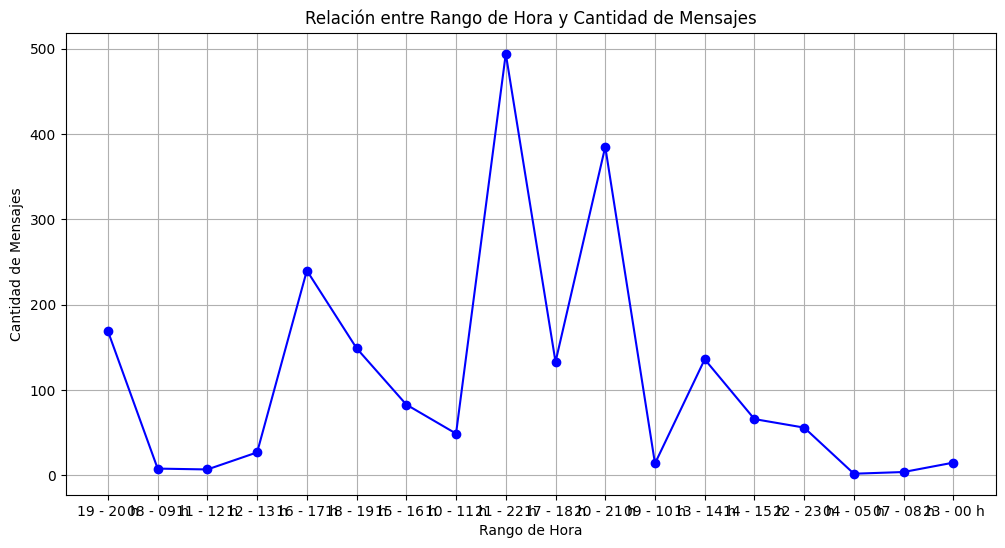

<Figure size 2400x1200 with 0 Axes>

In [55]:
# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por hora'] = 1

df['# Mensajes por hora'] = df.groupby('rangoHora')['# Mensajes por hora'].transform('sum')

# Eliminar duplicados para evitar la sobrecontabilización
#df = df.drop_duplicates(subset=['rangoHora', '# Mensajes por hora'])
df_rangos = df.drop_duplicates(subset=['rangoHora', '# Mensajes por hora'])

#Plotear la cantidad de mensajes respecto del tiempo
plt.figure(figsize=(12, 6)) 
plt.plot(df_rangos['rangoHora'], df_rangos['# Mensajes por hora'], marker='o', linestyle='-', color='b')

# Personaliza el gráfico según tus preferencias
plt.title('Relación entre Rango de Hora y Cantidad de Mensajes')
plt.xlabel('Rango de Hora')
plt.ylabel('Cantidad de Mensajes')
plt.grid(True)

plt.figure(figsize=(24, 12)) 
plt.show()

In [56]:
df_rangos

,Fecha,Hora,Miembro,Mensaje,Emojis,links,rangoHora,# Mensajes por hora
0,2023-11-05,7:09 p. m.,Miguel Angel Diaz,Holii,[],0,19 - 20 h,169
83,2023-11-06,8:06 a. m.,Miguel Angel Diaz,Ksjsks,[],0,08 - 09 h,8
86,2023-11-06,11:46 a. m.,Zharith,null,[],0,11 - 12 h,7
92,2023-11-06,12:26 p. m.,Miguel Angel Diaz,JSJWKSJSJ,[],0,12 - 13 h,27
112,2023-11-06,4:23 p. m.,Miguel Angel Diaz,Holiiii,[],0,16 - 17 h,240
113,2023-11-06,6:30 p. m.,Zharith,Holiiiiiii,[],0,18 - 19 h,149
114,2023-11-12,3:31 p. m.,Zharith,Oye...,[],0,15 - 16 h,83
116,2023-11-13,10:45 a. m.,Miguel Angel Diaz,Hola,[],0,10 - 11 h,49
127,2023-11-13,9:10 p. m.,Miguel Angel Diaz,Shh,[],0,21 - 22 h,494
128,2023-11-16,5:27 p. m.,Miguel Angel Diaz,Holii,[],0,17 - 18 h,133


In [57]:
df

,Fecha,Hora,Miembro,Mensaje,Emojis,links,rangoHora,# Mensajes por hora
0,2023-11-05,7:09 p. m.,Miguel Angel Diaz,Holii,[],0,19 - 20 h,169
1,2023-11-05,7:10 p. m.,Miguel Angel Diaz,Me instale wathdsoo,[],0,19 - 20 h,169
2,2023-11-05,7:10 p. m.,Zharith,QUEEEEEEEEE,[],0,19 - 20 h,169
3,2023-11-05,7:10 p. m.,Zharith,AAAAAAA ERES TUUUUUUU,[],0,19 - 20 h,169
4,2023-11-05,7:10 p. m.,Zharith,Voy a llorar,[],0,19 - 20 h,169
...,...,...,...,...,...,...,...,...
2032,2023-11-30,10:08 a. m.,Miguel Angel Diaz,te amooo,[],0,10 - 11 h,49
2033,2023-11-30,10:08 a. m.,Miguel Angel Diaz,peldon,[],0,10 - 11 h,49
2034,2023-11-30,10:08 a. m.,Miguel Angel Diaz,es que,[],0,10 - 11 h,49
2035,2023-11-30,10:08 a. m.,Miguel Angel Diaz,se da;a,[],0,10 - 11 h,49


# MENSAJES POR DIA

In [58]:
# Crear una columna de 1 para realizar el conteo de mensajes
df['# Mensajes por dia'] = 1

# Sumar (contar) los mensajes que tengan la misma fecha
df['# Mensajes por dia'] = df.groupby('Fecha')['# Mensajes por dia'].transform('sum')

# Eliminar duplicados para evitar la sobrecontabilización
#df = df.drop_duplicates(subset=['rangoHora', '# Mensajes por hora'])
df_dias = df.drop_duplicates(subset=['Fecha', '# Mensajes por dia'])

df_dias

,Fecha,Hora,Miembro,Mensaje,Emojis,links,rangoHora,# Mensajes por hora,# Mensajes por dia
0,2023-11-05,7:09 p. m.,Miguel Angel Diaz,Holii,[],0,19 - 20 h,169,83
83,2023-11-06,8:06 a. m.,Miguel Angel Diaz,Ksjsks,[],0,08 - 09 h,8,31
114,2023-11-12,3:31 p. m.,Zharith,Oye...,[],0,15 - 16 h,83,2
116,2023-11-13,10:45 a. m.,Miguel Angel Diaz,Hola,[],0,10 - 11 h,49,12
128,2023-11-16,5:27 p. m.,Miguel Angel Diaz,Holii,[],0,17 - 18 h,133,236
364,2023-11-17,9:07 p. m.,Zharith,O por aquí?,[],0,21 - 22 h,494,220
584,2023-11-18,8:00 a. m.,Miguel Angel Diaz,Holiiii,[],0,08 - 09 h,8,4
588,2023-11-27,1:06 p. m.,Miguel Angel Diaz,Holii,[],0,13 - 14 h,136,572
1160,2023-11-28,8:49 a. m.,Miguel Angel Diaz,HOLIII,[],0,08 - 09 h,8,567
1727,2023-11-29,4:20 a. m.,Zharith,Holi amoooor,[],0,04 - 05 h,2,259


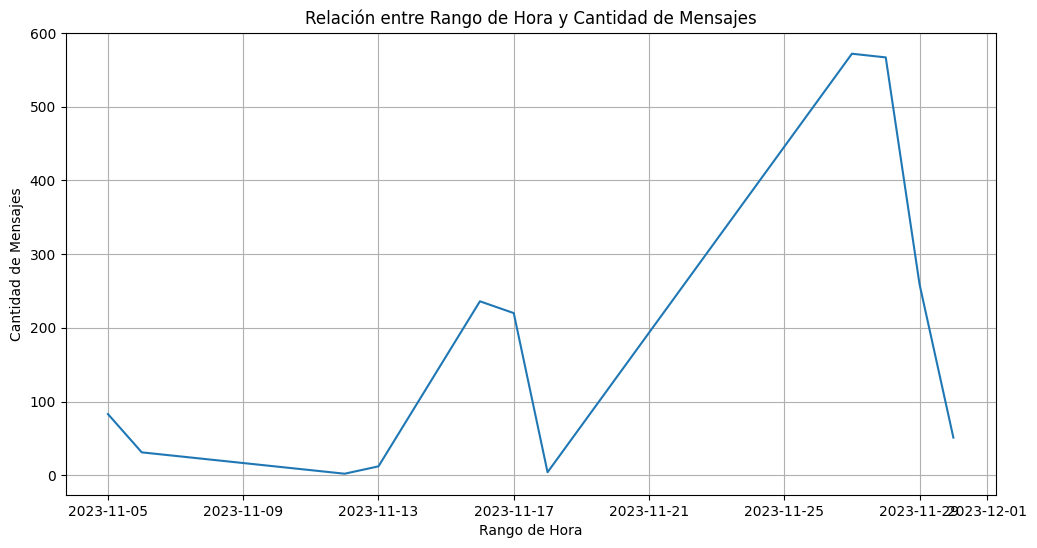

<Figure size 1200x600 with 0 Axes>

In [59]:
plt.figure(figsize=(12, 6)) 
plt.plot(df_dias['Fecha'], df_dias['# Mensajes por dia'])

# Personaliza el gráfico según tus preferencias
plt.title('Relación entre Rango de Hora y Cantidad de Mensajes')
plt.xlabel('Rango de Hora')
plt.ylabel('Cantidad de Mensajes')
plt.grid(True)

plt.figure(figsize=(12, 6)) 
plt.show()

# PALABRAS QUE MAS USAMOS

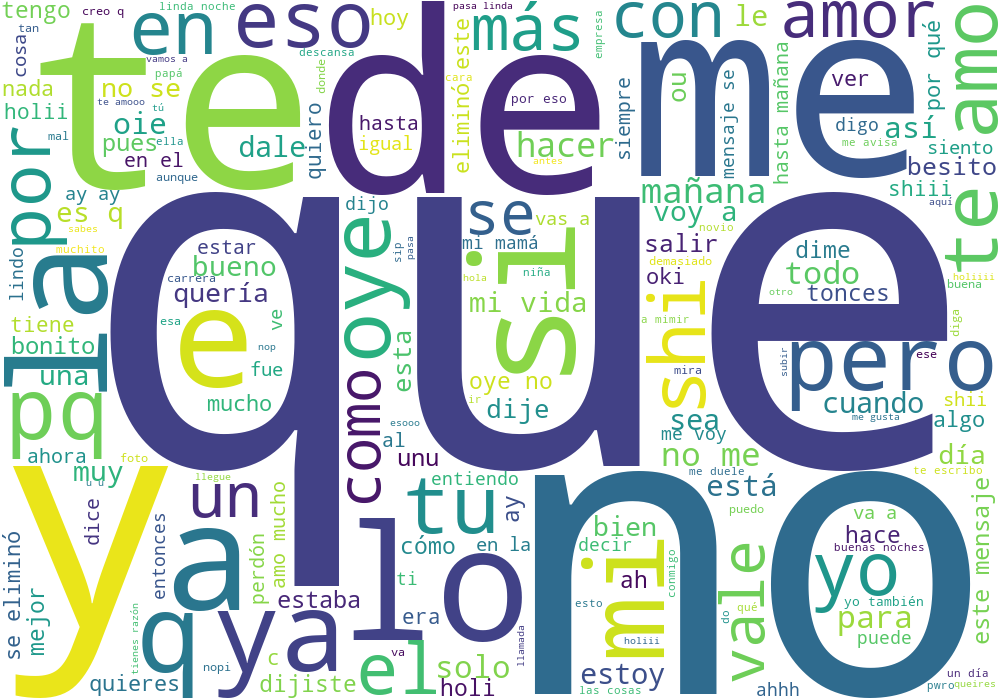

In [60]:
# Crear un string que contendrá todas las palabras
total_palabras = ' '

# Obtener y acumular todas las palabras de cada mensaje
for mensaje in mensajes_df['Mensaje'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras

wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                stopwords = 'stopwords',
                min_font_size = 10).generate(total_palabras)

# Plotear la nube de palabras más usadas
wordcloud.to_image()